# 2

In [504]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('../data/Covid.csv')

##### เลือกข้อมูลเฉพาะที่โจทย์กำหนด

In [505]:
iso = ['THA', 'JPN', 'SGP', 'IND', 'EGY', 'USA', 'GBR']
df = df[df['iso_code'].isin(iso)]
df = df[df['date']>='2021-01-01']
df = df[df['date']<='2022-06-30']

##### เก็บข้อมูลแยก newcases กับ newdeath ทั้งหมด 7 ประเทศไว้ในตัวแปร

In [506]:
x = df.groupby('date').sum()
date = df['date'].unique()
newcases = [i for i in x['new_cases_per_million']]
deathcases = [i for i in x['new_deaths_per_million']]

##### ใช้ plt.xlabel & ylabel ไม่ได้ครับ TT

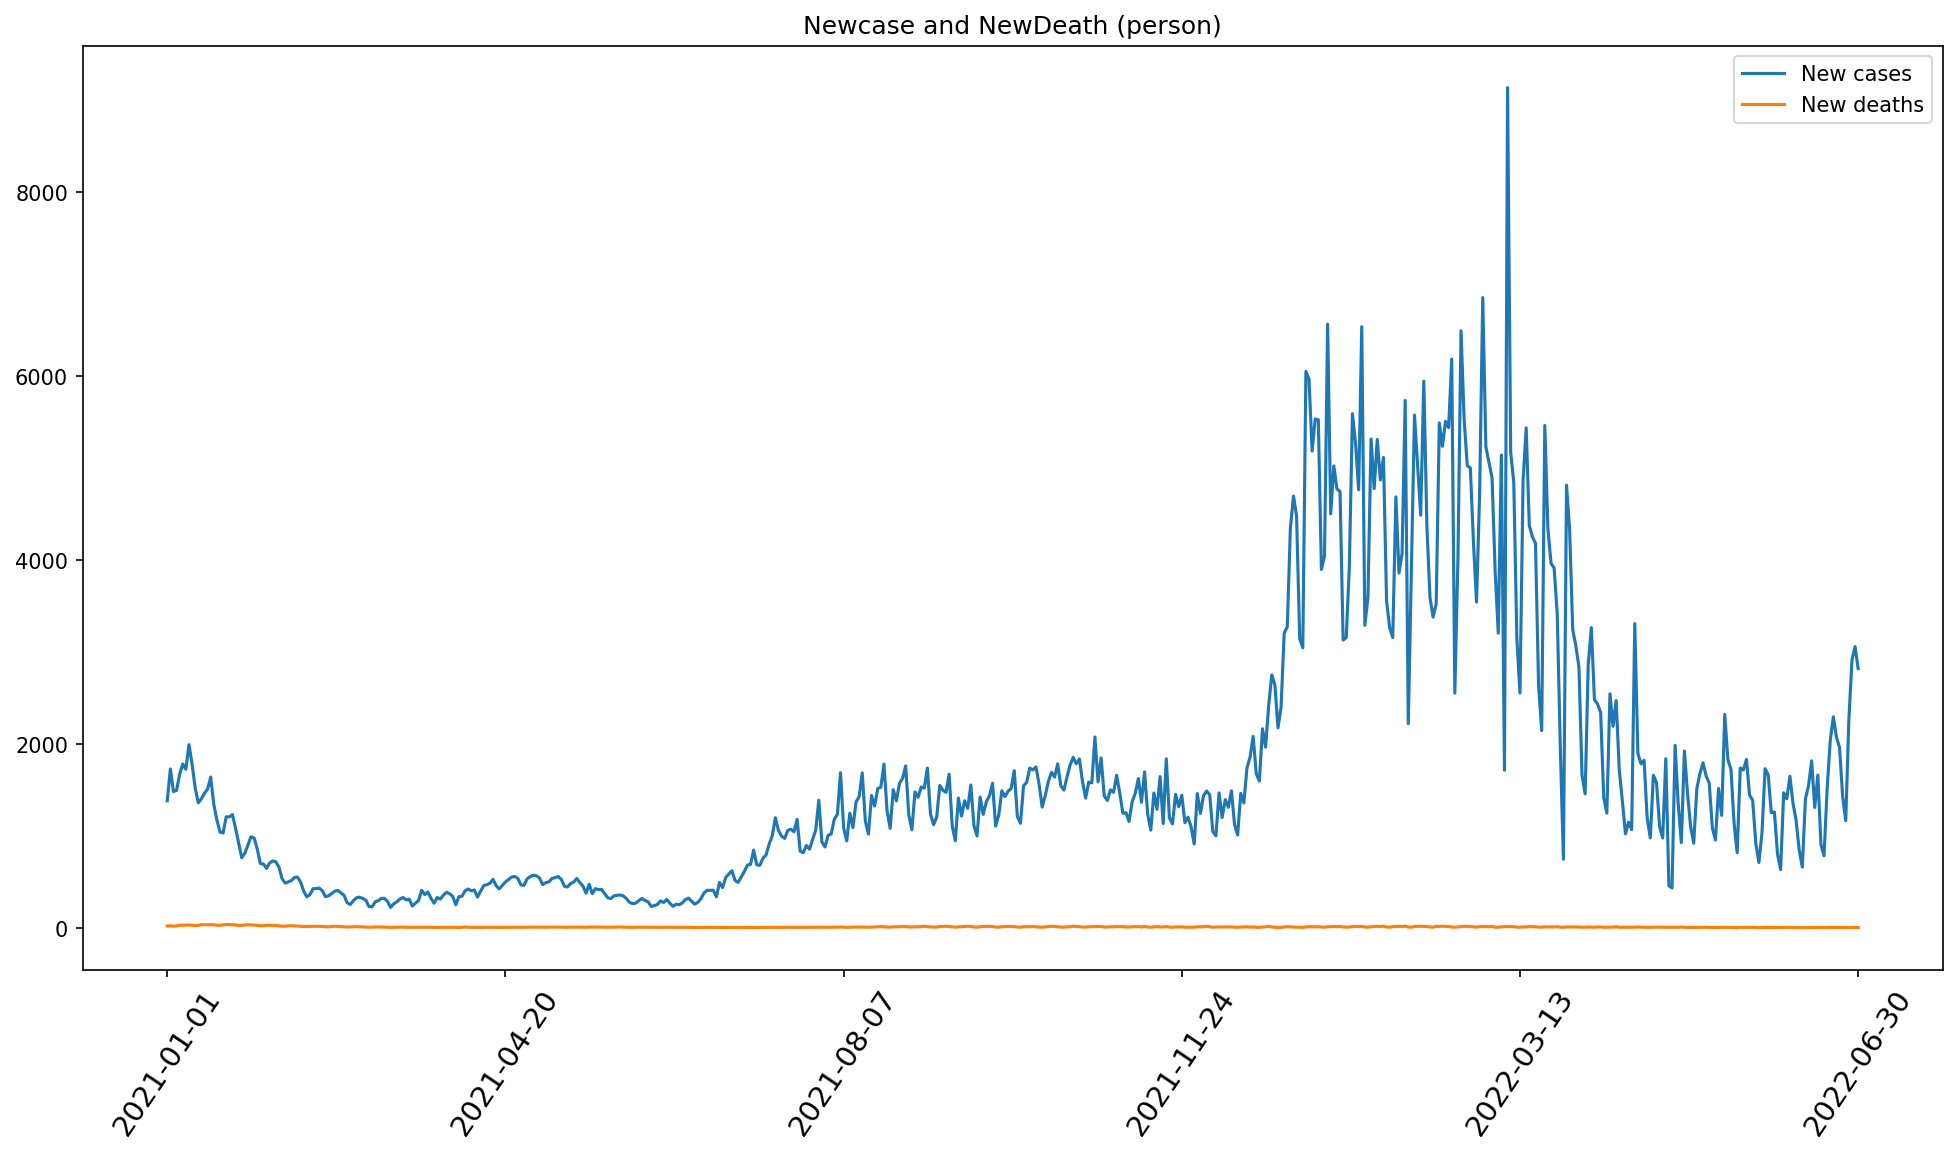

In [518]:
plt.figure(figsize=(16, 8), dpi=150)
plt.plot(date, newcases,label = 'New cases')
plt.plot(date, deathcases,label = 'New deaths')

len_date = len(df['date'].unique())//5
xtrick = [int(i * len_date) for i in range(6)]
plt.gca().set_xticks(xtrick)
plt.title('Newcase and NewDeath (person)' )

plt.legend()
plt.xticks(fontsize=14, rotation=56)
plt.show()

# 1


##### เลือกคอลัมบ์ เฉพาะ ปี ประเภทหนัง และ เรทติ้งของหนัง โดยคลีน data ปี ลบเครื่องหมายต่างๆ และวงเล็บ และรีเซ็ต index

In [449]:
kr = pd.read_csv('../data/Korean.csv')
kr = kr[['Year','Genre','Rating']]
kr['Year'] = kr['Year'].str.replace(r'\D', '')
kr = kr.dropna().reset_index()
kr

C:\Users\thego\AppData\Local\Temp\ipykernel_15052\812695329.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.



,index,Year,Genre,Rating
0,0,2021,"Crime, Drama, Fantasy",6.7
1,1,2021,"Action, Drama, Mystery",8.1
2,2,2021,"Action, Crime, Drama",7.9
3,3,2015,"Animation, Action, Adventure",7.7
4,4,2021,"Action, Fantasy, Thriller",8.6
...,...,...,...,...
1973,1983,2002,Drama,-
1974,1985,2021,"Fantasy, Romance",7.4
1975,1986,2021,"Comedy, Romance",7.1
1976,1987,2021,Romance,-


##### คลีน data Year โดยสร้าง dataframe  ใหม่ ให้แบ่งเป็นปี เช่น 2016 -2018 ก็แบ่งเป็น 3 แถว 2016 2017 2018 โดยข้อมูล ที่เหลือยังคงเดิม และ data ที่เป็น "2017-" นับเป็นปี 2017 ปีเดียวไม่มีปีอื่นเนื่องจากกำหนดไม่ชัดเจนและข้อมูลมีโอกาสเปลี่ยนแปลงได้ในอนาคต

In [450]:
x = kr['Year']
x
for i in range(len(kr)):
    a = str(*kr[kr['index']==i]['Year'].values)[:4]
    b = str(*kr[kr['index']==i]['Year'].values)[-4:]
    if len(str(*kr[kr['index']==i]['Year'].values))==4:
        if i==0:
            df = pd.DataFrame([[*kr[kr['index']==i]['Year'].values, *kr[kr['index']==i]['Genre'].values, *kr[kr['index']==i]['Rating'].values]],columns=['Year','Genre','Rating'])
        else: 
            df.loc[len(df.index)] = [str(kr[kr['index']==i]['Year'].values)[2:-2],str(kr[kr['index']==i]['Genre'].values)[2:-2],str(kr[kr['index']==i]['Rating'].values)[2:-2]]
        
    else:
        try:
            r=int(b)-int(a)
            for i in range(r):
                df.loc[len(df.index)] = [int(a)+i,str(kr[kr['index']==i]['Genre'].values)[2:-2],str(kr[kr['index']==i]['Rating'].values)[2:-2]]
        except:
            pass
         


##### เลือก data เฉพาะที่ต้องการ คือปี 2016-2021 และหนังประเภท 'Comedy','Romance', 'Drama', 'Fantasy' ,'Thriller' เท่านั้น

In [451]:
year = ["2016","2017","2018","2019","2020","2021"]
filter1 = df["Year"].isin(year)
searchfor = ['Comedy','Romance', 'Drama', 'Fantasy' ,'Thriller']
filter2 = df["Genre"].str.contains('|'.join(searchfor))
df1 = df[filter1 & filter2]


In [452]:
df1=df1.reset_index()

##### เก็บข้อมูลของแต่ละประเภทในแต่ละปีไว้ใน array

In [463]:
import numpy as np
search_c = np.zeros((6,5))
for i in range(len(df1)):
    for j in range(len(searchfor)):
        if searchfor[j] in df1.loc[i]['Genre']:
            search_c[int(df1.loc[i]['Year'])-2016][j]+=1
search_c = search_c.astype(int)
search_c

array([[35, 33, 60,  9,  6],
       [24, 32, 54, 14,  6],
       [30, 41, 70, 10,  5],
       [28, 25, 72, 13,  7],
       [34, 37, 49, 26,  6],
       [29, 40, 60, 16, 13]])

##### สร้างตารางจำนวนหนัง 

In [467]:
index = ['2016', '2017', '2018',
         '2019', '2020', "2021"]
df3 = pd.DataFrame({'Comady': search_c[:,0],
                   'Romance': search_c[:,1], 
                   'Drama': search_c[:,2],
                   'Fantastic' : search_c[:,3], 
                   'Thriller' : search_c[:,4],
                   }, index=index)

##### เก็บค่า Rating ที่แยกเป็นประเภทและปีเก็บไว้ array 

In [486]:
import numpy as np
search_r  = np.zeros((6,5))
search_rc = np.zeros((6,5))
for i in range(len(df1)):
    for j in range(len(searchfor)):
        if df1.loc[i]['Rating'] != '-':
            if searchfor[j] in df1.loc[i]['Genre']:
                search_r[int(df1.loc[i]['Year'])-2016][j]+=float(df1.loc[i]['Rating'])
                search_rc[int(df1.loc[i]['Year'])-2016][j]+=1
search_rate=search_r/search_rc
search_rate

array([[7.30882353, 7.2625    , 7.30384615, 7.5       , 7.3       ],
       [7.29565217, 7.203125  , 7.33265306, 7.4       , 7.51666667],
       [7.35      , 7.26666667, 7.43538462, 7.06      , 7.66      ],
       [7.588     , 7.492     , 7.60909091, 7.56923077, 7.77142857],
       [7.43333333, 7.45277778, 7.49166667, 7.48846154, 7.73333333],
       [7.35185185, 7.68285714, 7.70192308, 7.34285714, 7.42222222]])

##### สร้างตารางเก็บ Rating

In [498]:
index = ['2016', '2017', '2018',
         '2019', '2020', "2021"]
df4 = pd.DataFrame({'Comady': search_rate[:,0],
                   'Romance': search_rate[:,1], 
                   'Drama': search_rate[:,2],
                   'Fantastic' : search_rate[:,3], 
                   'Thriller' : search_rate[:,4],
                   }, index=index)

##### โชว์กราฟ โดย rating เป็นกราฟเส้นเพราะข้อมูลค่อนข้างห่างและเป็นทศนิยมกันน้อยและสามารถดูความแตกต่างของแต่ละปีได้ดีc และจำนวนหนังโชว์เป็นกราฟแท่งเพราะเป็นเลขจำนวนเต็มและกราฟแท่งทำให้เปรียบเทียบข้อมูลแต่ละปีและประเภทได้ง่าย

##### โชว์กราฟ

Text(0, 0.5, 'Number of movie')

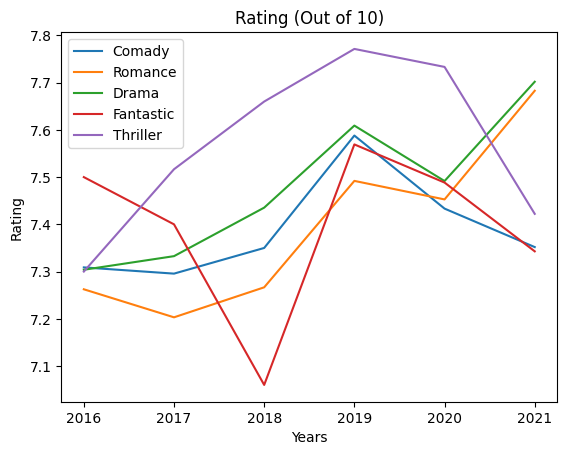

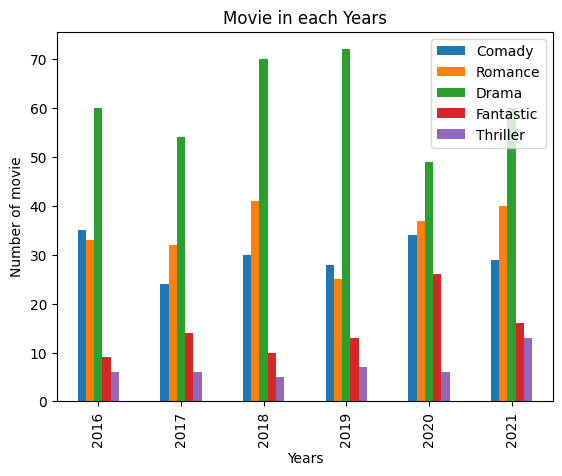

In [520]:
ax = df4.plot()
ax.set_title('Rating (Out of 10)')
ax.set_xlabel('Years')
ax.set_ylabel('Rating')
ax = df3.plot.bar()
ax.set_title('Movie in each Years')
ax.set_xlabel('Years')
ax.set_ylabel('Number of movie')